### PimaIndiansdiabetes :
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [20]:
import pandas as pd
df1 = pd.read_csv('Datasets/PimaIndiansdiabetes.csv')

In [21]:
df1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [22]:
df1.shape

(768, 9)

In [23]:
def countZeros(df):
    zeros={}
    for col in df.columns:
        if col not in ['Pregnancies' ,'Outcome']:
            l = len(list(filter(lambda x : x==0,df[col])))
            zeros[col] = l
    return zeros
countZeros(df1)

{'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11,
 'DiabetesPedigreeFunction': 0,
 'Age': 0}

###  Hospital Frankfurt Germany diabetes dataset
https://www.kaggle.com/datasets/johndasilva/diabetes

In [24]:
df2 = pd.read_csv('Datasets/FrankfurtGermanyDiabetes.csv')
df2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [25]:
df2.shape

(2000, 9)

In [26]:
countZeros(df2)

{'Glucose': 13,
 'BloodPressure': 90,
 'SkinThickness': 573,
 'Insulin': 956,
 'BMI': 28,
 'DiabetesPedigreeFunction': 0,
 'Age': 0}

## Concatenating `df1` anf `df2`

In [27]:
final_df = pd.concat([df1,df2],ignore_index = True)

In [28]:
final_df.shape

(2768, 9)

In [29]:
countZeros(final_df)

{'Glucose': 18,
 'BloodPressure': 125,
 'SkinThickness': 800,
 'Insulin': 1330,
 'BMI': 39,
 'DiabetesPedigreeFunction': 0,
 'Age': 0}

In [30]:
final_df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.742775   121.102601      69.134393      20.824422    80.127890   
std       3.323801    32.036508      19.231438      16.059596   112.301933   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      62.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    37.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2768.000000               2768.000000  2768.000000  2768.000000  
mean     32.137392                  0.471193    33.132225     0.343931  
std       8.076127                  0.325669    11.777230     0.475104  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.300000                  0.244000    24.000000     0.000000  
50%      32.200000                  0.375000    29.000000     0.000000  
75%      36.625000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

Text(0.5, 1.0, 'Correlation plot ')

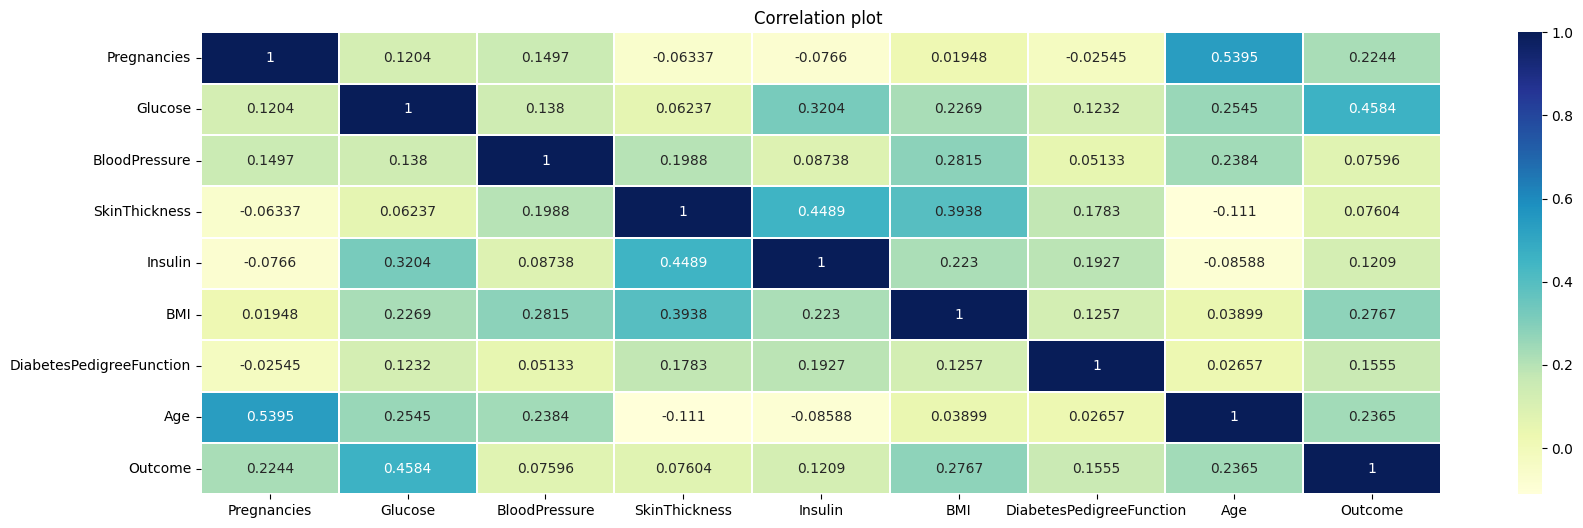

In [31]:
# Visulization of correlations
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(20,6))
sn.heatmap(df2.corr(),annot=True,fmt='0.4g',cmap="YlGnBu",linewidths=.3)
plt.title("Correlation plot ")

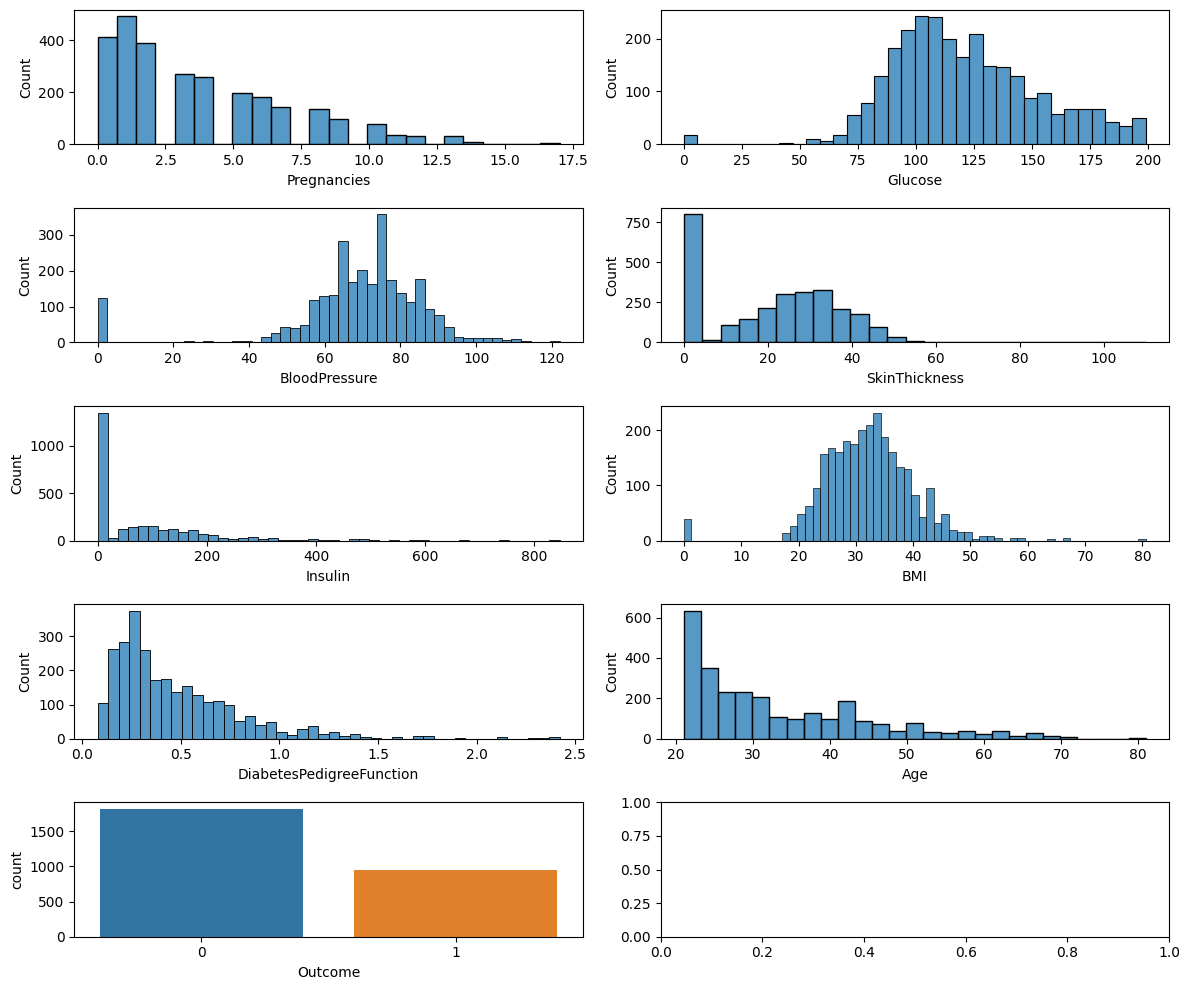

In [32]:
def distribution_Plot(df):
    fig, axes = plt.subplots(5, 2, figsize=(12, 10))

    sn.histplot(data=df, x="Pregnancies",ax=axes[0,0])

    sn.histplot(data=df, x="Glucose",ax=axes[0,1])

    sn.histplot(data=df, x="BloodPressure",ax=axes[1,0])

    sn.histplot(data=df, x="SkinThickness",ax=axes[1,1])

    sn.histplot(data=df, x="Insulin",ax=axes[2,0])

    sn.histplot(data=df, x="BMI",ax=axes[2,1])

    sn.histplot(data=df, x="DiabetesPedigreeFunction",ax=axes[3,0])

    sn.histplot(data=df, x="Age",ax=axes[3,1])

    sn.countplot(data=df, x="Outcome",ax=axes[4,0])

    plt.tight_layout();
# Calling
distribution_Plot(final_df)

__We can see that some features have zero value and that is not relevent so I am replacing zero with respect to correlation .__
* __i.e `SkinThickness` and `BMI` has a positive correlation of `39%`, so i am replacling(_Zeros of skinthickness_) `SkinThickness = BMI+BMI*0.39`.__
* __i.e `Insulin` and `Glucose` has a positive correlation of `33%`, so i am replacling(_Zeros of Insulin) `Insulin = Glucose+Glucose*0.33`__
* __i.e `BloodPressure` and `BMI` has a positive correlation of `28%`, so i am replacling(_Zeros of Insulin) `BloodPressure = BMI+BMI*0.28`__

In [33]:
#replacing zeros of BMI and Gucose with mean 
final_df['BMI'].replace(0 , round(df2['BMI'].mean(),2),inplace = True)
final_df['Glucose'].replace(0 , int(df2['Glucose'].mean()),inplace = True)

In [34]:
def replaceZeros(df,colZero,colVal,factor):
    for i in range(df.shape[0]):
        if df[colZero][i] == 0:
            v = df[colVal][i]
            val = v+v*factor
            if val <= df[colZero].max() and val>0:
                df[colZero].replace(0 ,int(val),inplace = True)
            else:
                df[colZero].replace(0 ,int(df1['Glucose'].mean()),inplace = True)
    return f"replaced zeros of feature {colZero} successfully."

In [35]:
replaceZeros(final_df,"SkinThickness","BMI",0.3938)
replaceZeros(final_df,"Insulin","Glucose",0.3204)
replaceZeros(final_df,"BloodPressure","BMI",0.2815)

'replaced zeros of feature BloodPressure successfully.'

In [36]:
countZeros(final_df)

{'Glucose': 0,
 'BloodPressure': 0,
 'SkinThickness': 0,
 'Insulin': 0,
 'BMI': 0,
 'DiabetesPedigreeFunction': 0,
 'Age': 0}

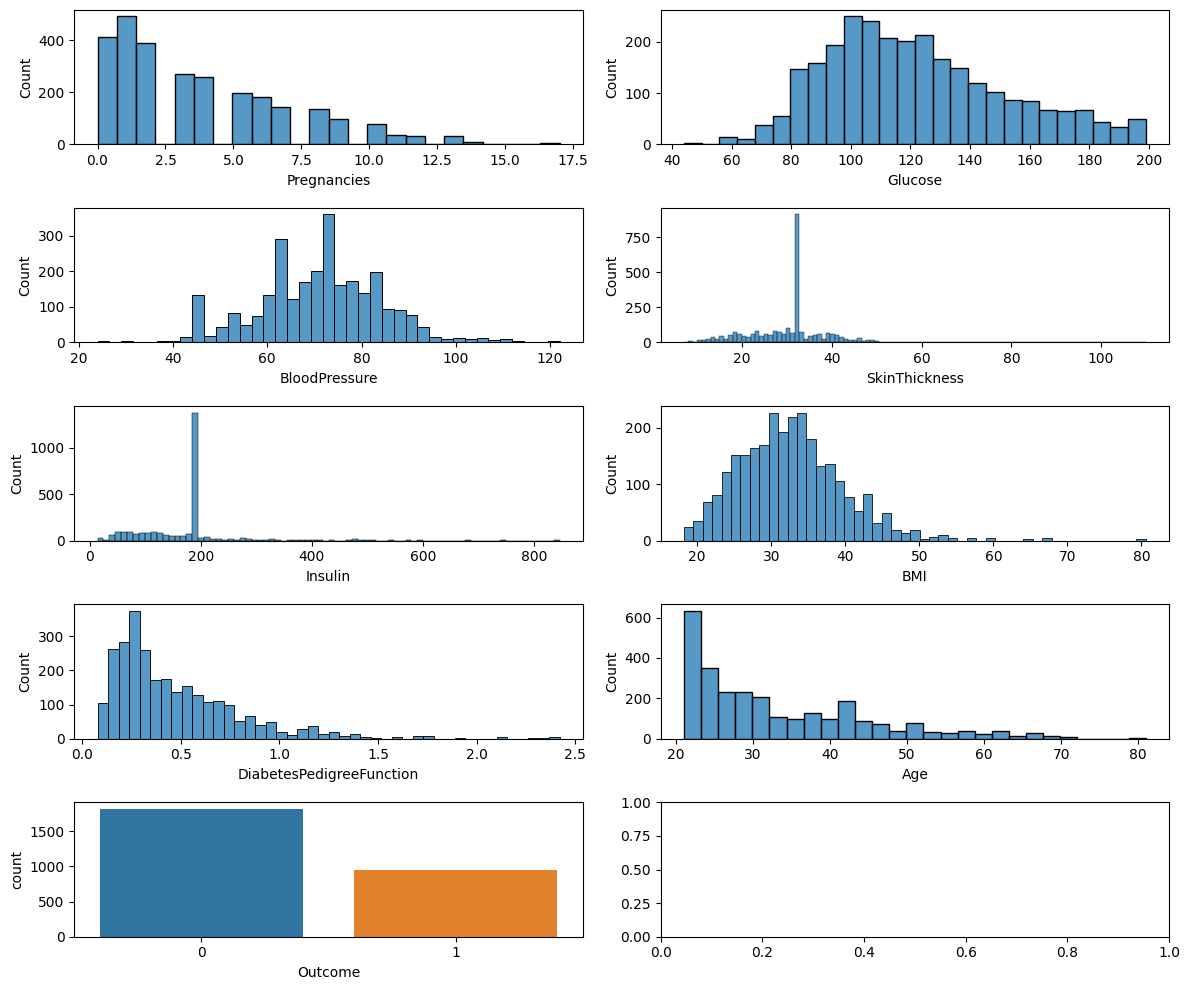

In [37]:
distribution_Plot(final_df)

Text(0.5, 1.0, 'Correlation plot ')

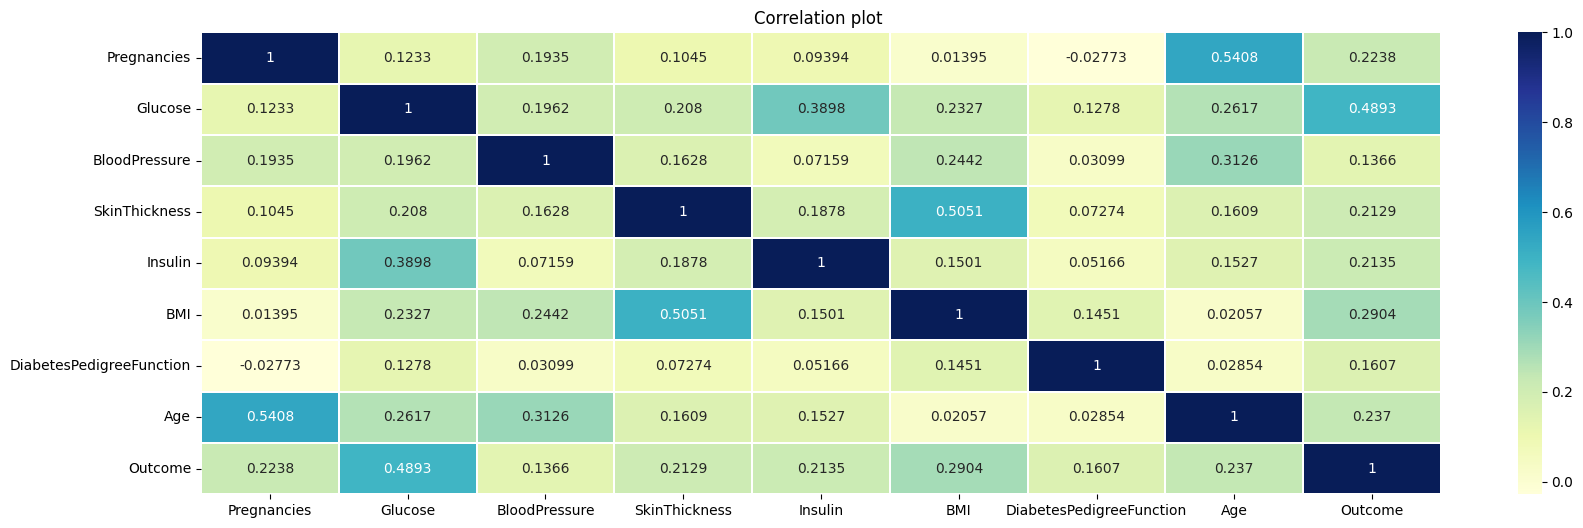

In [38]:
# Visulization of correlations
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(20,6))
sn.heatmap(final_df.corr(),annot=True,fmt='0.4g',cmap="YlGnBu",linewidths=.3)
plt.title("Correlation plot ")

In [39]:
final_df.to_csv("Datasets/FinalDiabetesDataset(Corr).csv",index=False)

## Normalization

In [73]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data = final_df.drop(columns=['Outcome'])
norm_df = pd.DataFrame(scalar.fit_transform(data),
                       columns=['Pregnancies','Glucose', 'BloodPressure',
                                'SkinThickness', 'Insulin','BMI',
                                'DiabetesPedigreeFunction', 'Age'])
norm_df.head(4)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.679232  0.856209       0.062815       0.540668  0.251606  0.142076   
1    -0.825341 -1.209667      -0.389389      -0.117743  0.251606 -0.843520   
2     1.281062  2.003918      -0.540124       0.211462  0.251606 -1.308158   
3    -0.825341 -1.078501      -0.389389      -0.776155 -0.948426 -0.632321   

   DiabetesPedigreeFunction       Age  
0                  0.478509  1.432495  
1                 -0.369130 -0.181079  
2                  0.616712 -0.096154  
3                 -0.934224 -1.030329

In [74]:
final_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [75]:
norm_df['Diabetic'] = final_df['Outcome']

In [76]:
norm_df.head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.679232  0.856209       0.062815       0.540668  0.251606  0.142076   
1    -0.825341 -1.209667      -0.389389      -0.117743  0.251606 -0.843520   
2     1.281062  2.003918      -0.540124       0.211462  0.251606 -1.308158   
3    -0.825341 -1.078501      -0.389389      -0.776155 -0.948426 -0.632321   
4    -1.126256  0.495500      -2.348943       0.540668 -0.069194  1.479670   

   DiabetesPedigreeFunction       Age  Diabetic  
0                  0.478509  1.432495         1  
1                 -0.369130 -0.181079         0  
2                  0.616712 -0.096154         1  
3                 -0.934224 -1.030329         0  
4                  5.579704 -0.011229         1

In [37]:
#norm_df.to_csv("FinalDiabetesDataset.csv",index=False)

In [4]:
from pandas_profiling import ProfileReport

In [6]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]